In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV

In [2]:
def analise_categoricos(parametro,base='evadiu_2sem'):
    figsize=(5,5)
    print(df[parametro].value_counts())
    print('nulls: ',df[parametro].isnull().sum())
    sns.catplot(data=df,kind='count',x=base,col=parametro)
    tab=pd.crosstab(columns=[df[base]],index=[df[parametro]],margins=True,normalize='index')
    display(tab)

In [3]:
def grid_hyper(clf,X_train,y_train,X_test,y_test, parameters):
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=-1, cv=5)
    search.fit(X_train,y_train)
    y_hat = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)


In [4]:
def plot_coefficients(classifier, feature_names, top_features=17):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # criar plot
 plt.figure(figsize=(15, 5))
 colors = ['black' if c < 0 else 'black' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(0, 0 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

In [5]:
df=pd.read_excel('Student_Applications_Performance.xlsx')

In [6]:
display(df)

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,7948112,18,F,BGD 4,N,N,Music Performance,N,NaN,800.0,...,B,Bachelors,18,18,16.0,13.0,0,0,0,0.0
3396,8023055,18,F,BGD 1,Y,N,Biology,N,20.0,NaN,...,B,Bachelors,13,9,NaN,NaN,0,0,0,0.0
3397,7926915,18,F,BGD 4,Y,N,Biology,N,NaN,1020.0,...,B,Bachelors,14,6,NaN,NaN,0,945840,1288980,0.0
3398,7877332,18,F,BGD 3,Y,N,Joint Enrollment - Accel,N,21.0,NaN,...,B,Bachelors,12,9,NaN,NaN,0,269100,0,-231720.0


In [7]:
df.shape

(3400, 56)

In [8]:
df.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [9]:
df.dtypes

STUDENT IDENTIFIER            int64
STDNT_AGE                     int64
STDNT_GENDER                 object
STDNT_BACKGROUND             object
IN_STATE_FLAG                object
INTERNATIONAL_STS            object
STDNT_MAJOR                  object
STDNT_MINOR                  object
STDNT_TEST_ENTRANCE1        float64
STDNT_TEST_ENTRANCE2        float64
STDNT_TEST_ENTRANCE_COMB    float64
FIRST_TERM                    int64
CORE_COURSE_NAME_1_F         object
CORE_COURSE_GRADE_1_F        object
CORE_COURSE_NAME_2_F         object
CORE_COURSE_GRADE_2_F        object
CORE_COURSE_NAME_3_F         object
CORE_COURSE_GRADE_3_F        object
CORE_COURSE_NAME_4_F         object
CORE_COURSE_GRADE_4_F        object
CORE_COURSE_NAME_5_F         object
CORE_COURSE_GRADE_5_F        object
CORE_COURSE_NAME_6_F         object
CORE_COURSE_GRADE_6_F        object
SECOND_TERM                   int64
CORE_COURSE_NAME_1_S         object
CORE_COURSE_GRADE_1_S        object
CORE_COURSE_NAME_2_S        

In [10]:
df['matricula']=df['STUDENT IDENTIFIER'] #matricula sera o novo index
df.drop('STUDENT IDENTIFIER',axis=1,inplace=True)
df['evadiu_2sem']=df['RETURNED_2ND_YR']
df.drop('RETURNED_2ND_YR',axis=1,inplace=True)

In [11]:
print(df['matricula'].isnull().sum())
print(df['evadiu_2sem'].isnull().sum())
print(df['evadiu_2sem'].value_counts())

0
0
1    2677
0     723
Name: evadiu_2sem, dtype: int64


# Categóricos


# Student Gender

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64
nulls:  0


evadiu_2sem,0,1
STDNT_GENDER,,
F,0.221963,0.778037
M,0.196825,0.803175
All,0.212647,0.787353


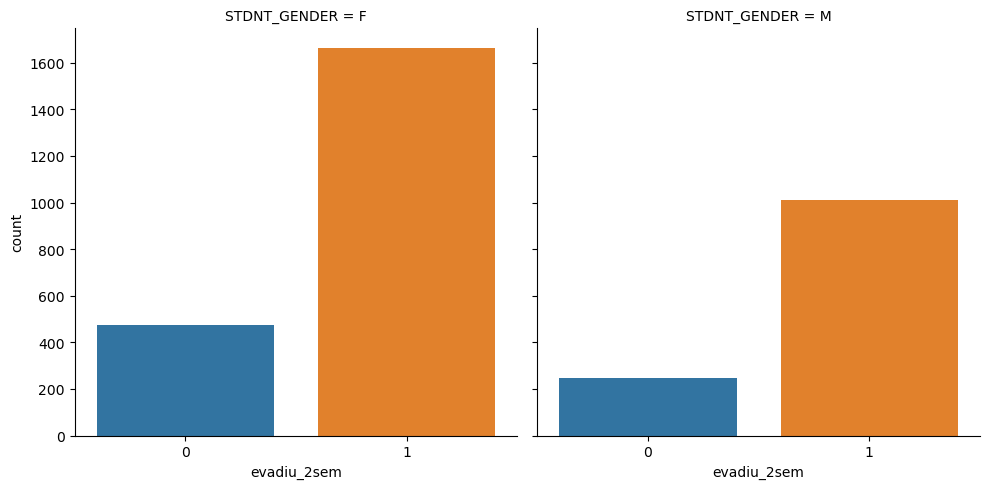

In [12]:
analise_categoricos('STDNT_GENDER')


In [13]:
df['STDNT_GENDER'].replace(["M","F"],[1,0],inplace=True)

# Student Background

In [14]:
analise_categoricos('STDNT_BACKGROUND')

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64
nulls:  0


evadiu_2sem,0,1
STDNT_BACKGROUND,,
BGD 1,0.229107,0.770893
BGD 2,0.226415,0.773585
BGD 3,0.179514,0.820486
BGD 4,0.187050,0.812950
BGD 5,0.500000,0.500000
BGD 6,0.148936,0.851064
BGD 7,0.368421,0.631579
BGD 8,0.200000,0.800000
All,0.212647,0.787353


In [15]:
df['STDNT_BACKGROUND'].replace(['BGD 7','BGD 5','BGD 8'],
 ['BG Outros','BG Outros','BG Outros'],inplace=True)

In [16]:
analise_categoricos('STDNT_BACKGROUND')

BGD 1        2082
BGD 3         947
BGD 4         139
BGD 2         106
BGD 6          94
BG Outros      32
Name: STDNT_BACKGROUND, dtype: int64
nulls:  0


evadiu_2sem,0,1
STDNT_BACKGROUND,,
BG Outros,0.375000,0.625000
BGD 1,0.229107,0.770893
BGD 2,0.226415,0.773585
BGD 3,0.179514,0.820486
BGD 4,0.187050,0.812950
BGD 6,0.148936,0.851064
All,0.212647,0.787353


In [17]:
df.shape


(3400, 56)

In [18]:
df.columns

Index(['STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND', 'IN_STATE_FLAG',
       'INTERNATIONAL_STS', 'STDNT_MAJOR', 'STDNT_MINOR',
       'STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2',
       'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME',

REALIZARO OHC

In [19]:
encoder_BGD=OneHotEncoder(drop=None)
temp=pd.DataFrame(encoder_BGD.fit_transform(df[['STDNT_BACKGROUND']]).toarray())
joblib.dump(encoder_BGD,'encoder_BGD.sav')
temp=temp.add_prefix('BGD')
df=df.join(temp)
df.drop('STDNT_BACKGROUND',axis=1,inplace=True)


In [20]:
df.shape

(3400, 61)

In [21]:
df.columns

Index(['STDNT_AGE', 'STDNT_GENDER', 'IN_STATE_FLAG', 'INTERNATIONAL_STS',
       'STDNT_MAJOR', 'STDNT_MINOR', 'STDNT_TEST_ENTRANCE1',
       'STDNT_TEST_ENTRANCE2', 'STDNT_TEST_ENTRANCE_COMB', 'FIRST_TERM',
       'CORE_COURSE_NAME_1_F', 'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F',
       'CORE_COURSE_GRADE_6_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S', 'HOUSING_STS', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD',
      

# Student in State

In [22]:
analise_categoricos('IN_STATE_FLAG')

Y    3063
N     337
Name: IN_STATE_FLAG, dtype: int64
nulls:  0


evadiu_2sem,0,1
IN_STATE_FLAG,,
N,0.264095,0.735905
Y,0.206987,0.793013
All,0.212647,0.787353


In [23]:
df['IN_STATE_FLAG'].replace(['Y','N'],
  [1,0],inplace=True)

# Student international

In [24]:
analise_categoricos('INTERNATIONAL_STS')

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64
nulls:  0


evadiu_2sem,0,1
INTERNATIONAL_STS,,
N,0.210792,0.789208
Y,0.444444,0.555556
All,0.212647,0.787353


Poucos dados para "Y"

In [25]:
df.drop('INTERNATIONAL_STS',axis=1,inplace=True)

# STDNT_MAJOR

In [26]:
df['STDNT_MAJOR'].value_counts()

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Political Science                  64
Chemistry                          64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [27]:
lista=df['STDNT_MAJOR'].value_counts()
lista_remover=[]
for i in range(0,len(lista)):
    if lista[i]<=60:
        lista_remover.append(lista.index[i])
lista_remover.append('Undeclared')
print(lista_remover)

['English Language/Literature', 'Engineering Studies', 'Marketing', 'Computer Science - Systems', 'Accounting', 'Health Science', 'Computer Science - Games', 'Joint Enrollment - Accel', 'History', 'Applied Computer Science', 'Theatre Education', 'English and Secondary Ed', 'Pre-Engineering/RETP', 'History and Secondary Ed', 'Mathematics', 'Finance', 'Management Information Systems', 'Sociology', 'Health and Physical Education', 'Middle Grades Education', 'Music', 'Spec Ed: Gen. Curr. - Reading', 'General Studies/AS', 'Mathematics and Secondary Ed', 'Information Technology', 'Art Education', 'Biology and Secondary Ed', 'Spanish', 'Spanish with Teacher Cert', 'French with Teacher Cert', 'Geology', 'French', 'Early Admission - Accel', 'Chemistry and Secondary Ed', 'Earth and Space Science', 'Liberal Arts', 'Undeclared']


In [28]:
df['STDNT_MAJOR'].replace(lista_remover,'Outros/Não especificado',inplace=True)

In [29]:
analise_categoricos('STDNT_MAJOR')

Outros/Não especificado      1284
Biology                       362
Early Childhood Education     190
Pre-Nursing                   177
Nursing                       164
Psychology                    155
Pre-Business                  133
Theatre Arts                  131
Music Performance              99
Criminal Justice               98
Music Education                96
General Business               85
Exercise Science               81
Art                            75
Management                     72
Communication                  70
Political Science              64
Chemistry                      64
Name: STDNT_MAJOR, dtype: int64
nulls:  0


evadiu_2sem,0,1
STDNT_MAJOR,,
Art,0.240000,0.760000
Biology,0.226519,0.773481
Chemistry,0.156250,0.843750
Communication,0.200000,0.800000
Criminal Justice,0.295918,0.704082
Early Childhood Education,0.194737,0.805263
Exercise Science,0.234568,0.765432
General Business,0.141176,0.858824
Management,0.208333,0.791667


Interessante manter, mas pode aumentar muito a dimensionalidade se fizermos via one hot encode.
Vamos testar

In [30]:
encoder_major=OneHotEncoder(drop=None)
temp=pd.DataFrame(encoder_major.fit_transform(df[['STDNT_MAJOR']]).toarray())
joblib.dump(encoder_major,'encoder_major.sav')
temp=temp.add_prefix('GRAD')
df=df.join(temp)
df.drop('STDNT_MAJOR',axis=1,inplace=True)

# STDNT_MINOR

In [31]:
df['STDNT_MINOR'].value_counts()

N                                3160
Spanish                            26
Psychology                         19
Music                              19
Foundations of Business            15
Communication                      14
History                            13
Theatre Arts                       12
Criminal Justice                   12
Computer Science - Systems         10
Early Childhood Education           9
Mathematics                         7
Professional Writing                6
Marketing                           6
Art History                         6
Art                                 5
Sociology                           5
English Language/Literature         5
Political Science                   4
Chemistry                           4
Accounting                          4
Biology                             4
French                              4
Computer Info. Management           3
Exercise Science                    3
International Business              3
Economics   

Poucos dados

In [32]:
df.drop('STDNT_MINOR',axis=1,inplace=True)

# Housing_STS

In [33]:
 analise_categoricos('HOUSING_STS')

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64
nulls:  0


evadiu_2sem,0,1
HOUSING_STS,,
Off Campus,0.196365,0.803635
On Campus,0.235377,0.764623
All,0.212647,0.787353


In [34]:
df['HOUSING_STS'].replace(['On Campus','Off Campus'],[1,0],inplace=True)

# FATHER_HI_EDU_CD & FATHER_HI_EDU_DESC

In [35]:
print(df['FATHER_HI_EDU_CD'].value_counts())
display(df['FATHER_HI_EDU_DESC'].value_counts())

2.0    1336
3.0    1309
4.0     226
1.0      97
Name: FATHER_HI_EDU_CD, dtype: int64


High School                  1336
College/Beyond               1309
No Information                432
Other/Unknown                 226
Middle School/Junior High      97
Name: FATHER_HI_EDU_DESC, dtype: int64

In [36]:
print(df['FATHER_HI_EDU_CD'].isnull().sum())
print(df['FATHER_HI_EDU_DESC'].isnull().sum())

432
0


No information em DESC é nulo em CD. Juntar eles com "other/unknown"
High School , College/Beyon e Middle School/Junior High tem relações de crescimento em relação ao outro -> int em vez de OHC
Other/unknown não tem essa informação -> levar a 0.

In [37]:
df.drop(['FATHER_HI_EDU_DESC'],axis=1,inplace=True)
df['FATHER_HI_EDU_CD'].fillna(0,inplace=True)
df['FATHER_HI_EDU_CD'].replace([4],[0],inplace=True)

In [38]:
analise_categoricos('FATHER_HI_EDU_CD')

2.0    1336
3.0    1309
0.0     658
1.0      97
Name: FATHER_HI_EDU_CD, dtype: int64
nulls:  0


evadiu_2sem,0,1
FATHER_HI_EDU_CD,,
0.0,0.229483,0.770517
1.0,0.268041,0.731959
2.0,0.216317,0.783683
3.0,0.196333,0.803667
All,0.212647,0.787353


# MOTHER_HI_EDU_CD & MOTHER_HI_EDU_DESC

In [39]:
print(df['MOTHER_HI_EDU_CD'].value_counts())
display(df['MOTHER_HI_EDU_DESC'].value_counts())

3.0    1500
2.0    1223
4.0     117
1.0      71
Name: MOTHER_HI_EDU_CD, dtype: int64


College/Beyond               1500
High School                  1223
No Information                489
Other/Unknown                 117
Middle School/Junior High      71
Name: MOTHER_HI_EDU_DESC, dtype: int64

In [40]:
print(df['MOTHER_HI_EDU_CD'].isnull().sum())
print(df['MOTHER_HI_EDU_DESC'].isnull().sum())

489
0


No information em DESC é nulo em CD. Juntar eles com "other/unknown"
High School , College/Beyon e Middle School/Junior High tem relações de crescimento em relação ao outro -> int em vez de OHC
Other/unknown não tem essa informação -> levar a 0.

In [41]:
df.drop(['MOTHER_HI_EDU_DESC'],axis=1,inplace=True)
df['MOTHER_HI_EDU_CD'].fillna(0,inplace=True)
df['MOTHER_HI_EDU_CD'].replace([4],[0],inplace=True)

In [42]:
analise_categoricos('MOTHER_HI_EDU_CD')

3.0    1500
2.0    1223
0.0     606
1.0      71
Name: MOTHER_HI_EDU_CD, dtype: int64
nulls:  0


evadiu_2sem,0,1
MOTHER_HI_EDU_CD,,
0.0,0.232673,0.767327
1.0,0.225352,0.774648
2.0,0.216680,0.783320
3.0,0.200667,0.799333
All,0.212647,0.787353


# CORE_COURSE_NAME_* e CORE_COURSE_GRADE_* 

In [43]:
print('nulls ', df['CORE_COURSE_NAME_1_F'].isnull().sum())
print(df['CORE_COURSE_NAME_1_F'].value_counts())

nulls  0
ENGL 1101     624
COMM 1110     278
HIST 2111     271
MATH 1111     226
CHEM 1211     202
             ... 
MATH 2125       1
PHYS 2311       1
GEOL 1121L      1
THEA 1100I      1
ENGL 2111       1
Name: CORE_COURSE_NAME_1_F, Length: 69, dtype: int64


In [44]:
print('nulls ', df['CORE_COURSE_GRADE_1_F'].isnull().sum())
print(df['CORE_COURSE_GRADE_1_F'].value_counts())

nulls  0
C          1024
B           941
D           538
F           440
A           322
NOT REP     106
INCOMPL      29
Name: CORE_COURSE_GRADE_1_F, dtype: int64


In [45]:
print('nulls ', df['CORE_COURSE_NAME_5_F'].isnull().sum())
print(df['CORE_COURSE_NAME_5_F'].value_counts())

nulls  2755
ENGL 1101                   81
ITDS 2749                   57
MATH 1111                   47
MATH 1101                   39
MUSC 1100                   38
COMM 1110                   33
POLS 1101                   32
ITDS 2735                   30
HIST 2111                   27
PSYC 1101                   23
CHEM 1211L                  23
CHEM 1151L                  19
THEA 1100                   19
SPAN 1001                   19
CPSC 1301L                  16
MATH 1113                   15
SOCI 1101                   14
LEAD 1705                   14
HIST 2112                   11
ITDS 2748                   10
STAT 1127                    7
SPAN 1002                    6
ECON 2106                    6
MATH 1131                    5
ENGL 1102                    5
ARTH 1100                    4
POLS 1101H                   3
FREN 1001                    3
MATH 1125                    3
HIST 1111                    3
BIOL 1215K                   3
CPSC 1105                  

In [46]:
print('nulls ', df['CORE_COURSE_NAME_2_S'].isnull().sum())
print(df['CORE_COURSE_NAME_2_S'].value_counts())

nulls  439
ENGL 1102     617
COMM 1110     208
POLS 1101     183
HIST 2111     164
HIST 2112     150
             ... 
POLS 1101H      1
GEOL 2225       1
MATH 2115       1
COMM 1110H      1
MATH 2125       1
Name: CORE_COURSE_NAME_2_S, Length: 69, dtype: int64


Referentes ao nome das matérias e as notas. São dados interessantes se atrelarmos a materia e a nota. Mas iria aumentar muito a dimensionalidade dos dados (em especial discriminar materiais). A quantidade de notas também depende das materias puxadas. Para simplificar o problema é mais fácil levarmos em conta apenas a quantidade de creditos puxados e de creditos aprovados.

In [47]:
df.drop(['CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F'
    ,'CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F','CORE_COURSE_NAME_4_F','CORE_COURSE_GRADE_4_F'
    ,'CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F'],axis=1,inplace=True)


In [48]:
df.drop(['CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S','CORE_COURSE_NAME_2_S','CORE_COURSE_GRADE_2_S'
    ,'CORE_COURSE_NAME_3_S','CORE_COURSE_GRADE_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_GRADE_4_S'
    ,'CORE_COURSE_NAME_5_S','CORE_COURSE_GRADE_5_S','CORE_COURSE_NAME_6_S','CORE_COURSE_GRADE_6_S'],axis=1,inplace=True)

# HIGH_SCHL_NAME 

In [49]:
df['HIGH_SCHL_NAME'].value_counts()

SCHOOL 11     249
SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
             ... 
SCHOOL 398      1
SCHOOL 344      1
SCHOOL 495      1
SCHOOL 493      1
SCHOOL 414      1
Name: HIGH_SCHL_NAME, Length: 439, dtype: int64

In [50]:
print(df['HIGH_SCHL_NAME'].nunique())
df['HIGH_SCHL_NAME'].value_counts()[1:20]

439


SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
SCHOOL 34     106
SCHOOL 27      71
SCHOOL 9       54
SCHOOL 7       53
SCHOOL 87      37
SCHOOL 14      36
SCHOOL 5       33
SCHOOL 22      32
SCHOOL 13      31
SCHOOL 24      31
SCHOOL 98      29
SCHOOL 153     29
SCHOOL 17      29
SCHOOL 141     28
SCHOOL 70      25
Name: HIGH_SCHL_NAME, dtype: int64

Utilizar School geraria uma dimensionalidade alta e temos pouco dados para cada escolar.


In [51]:
df.drop(['HIGH_SCHL_NAME'],axis=1,inplace=True)


# DEGREE GROUP CD & DEGREE_GROUP_DESC

In [52]:
print(df['DEGREE_GROUP_CD'].value_counts())
print(df['DEGREE_GROUP_DESC'].value_counts())

B    3384
A      12
V       4
Name: DEGREE_GROUP_CD, dtype: int64
Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64


Praticamente todos dados são de um único valor, com 12 amostras em um segundo valor e 4 amostras em um terceiro.

In [53]:
df.drop(['DEGREE_GROUP_CD','DEGREE_GROUP_DESC'],axis=1,inplace=True)

# Númericos

# Student Age

18    2860
17     309
19     190
20      14
16       8
21       7
22       4
23       3
25       3
26       1
24       1
Name: STDNT_AGE, dtype: int64
0


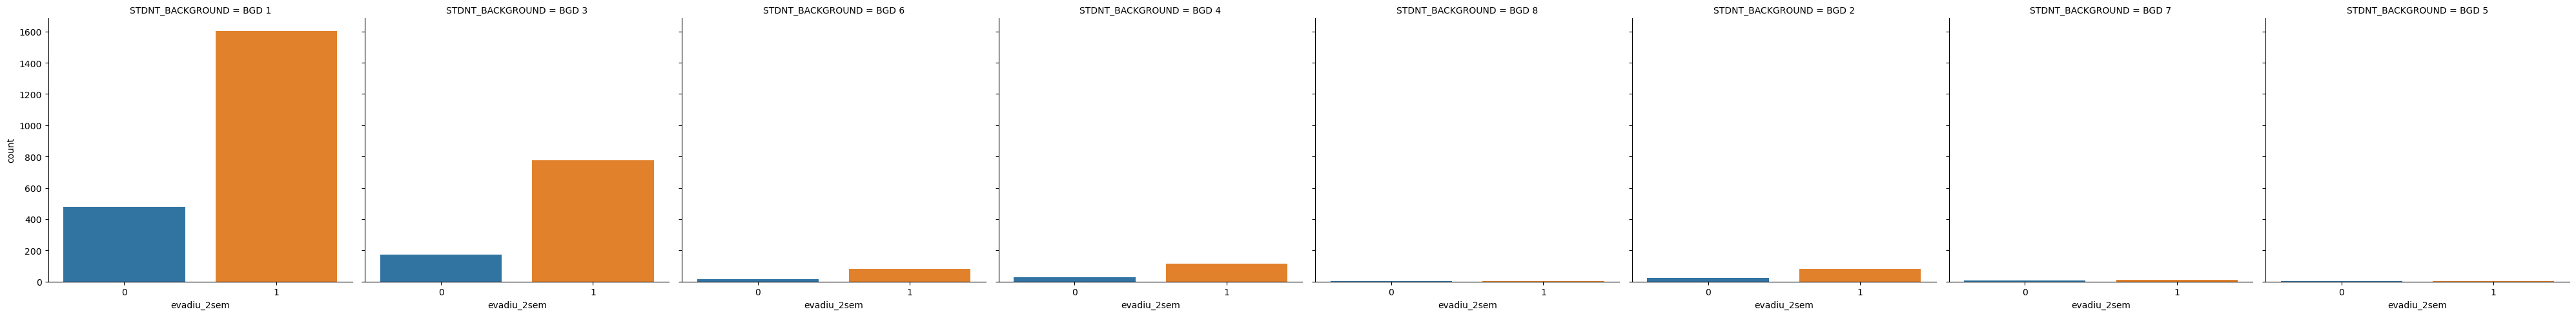

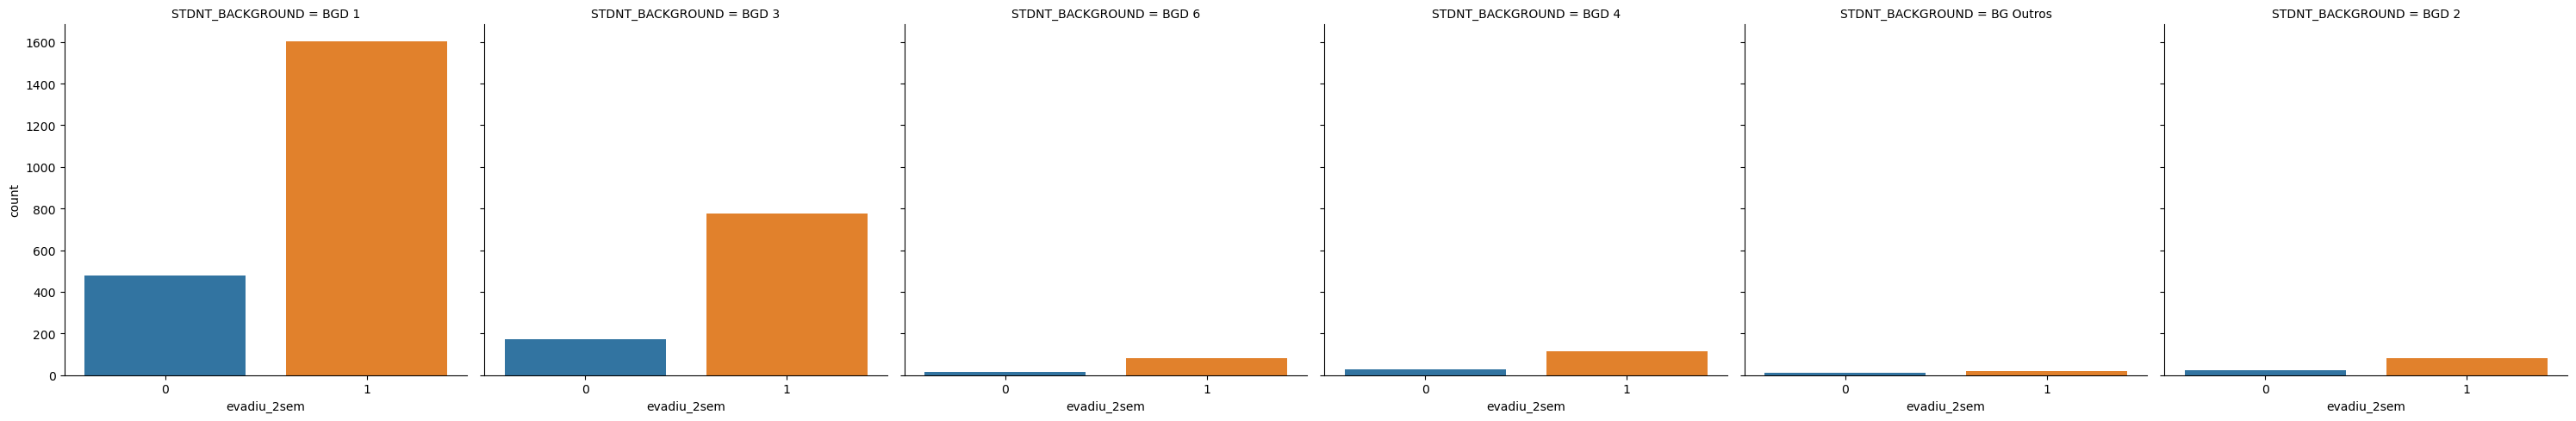

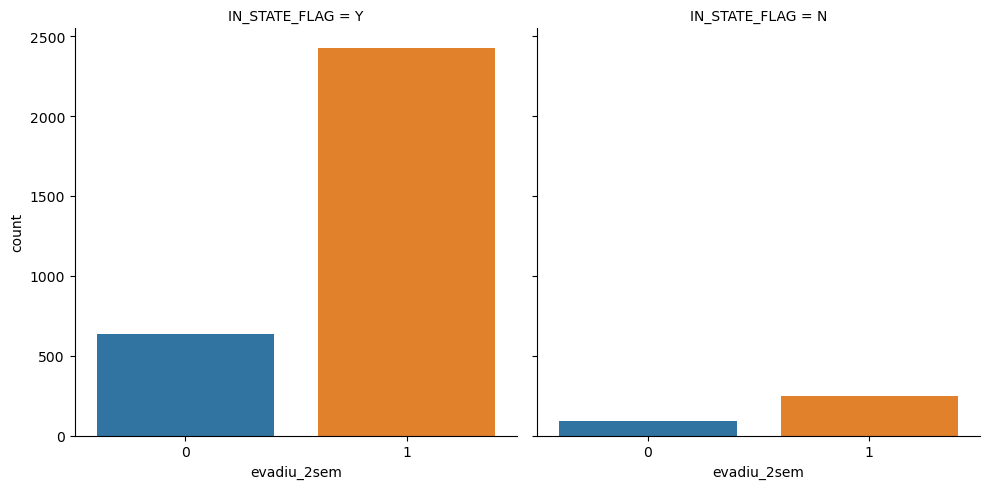

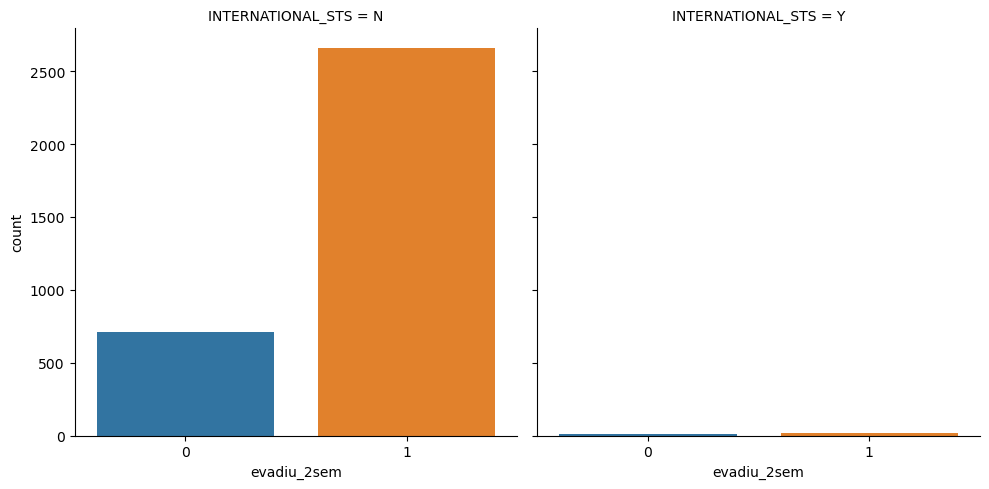

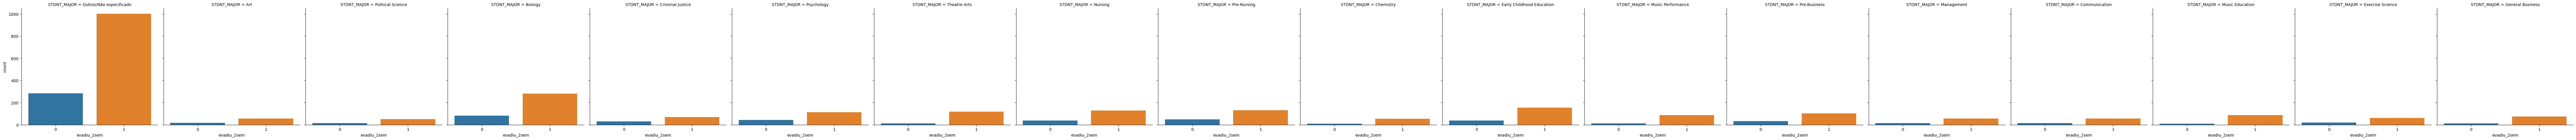

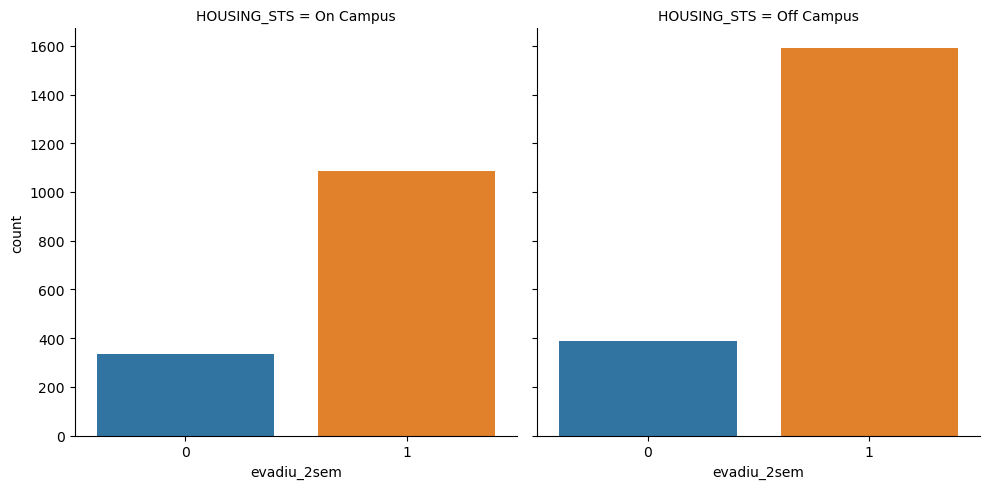

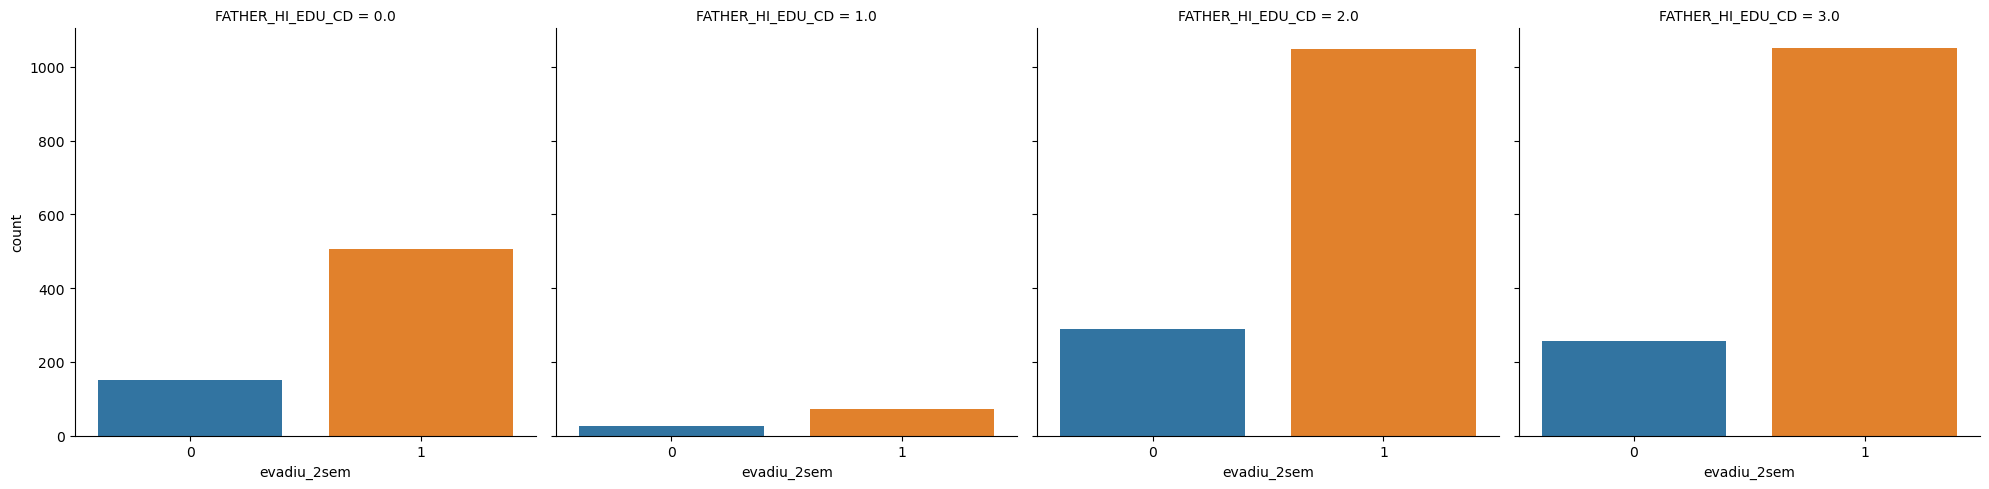

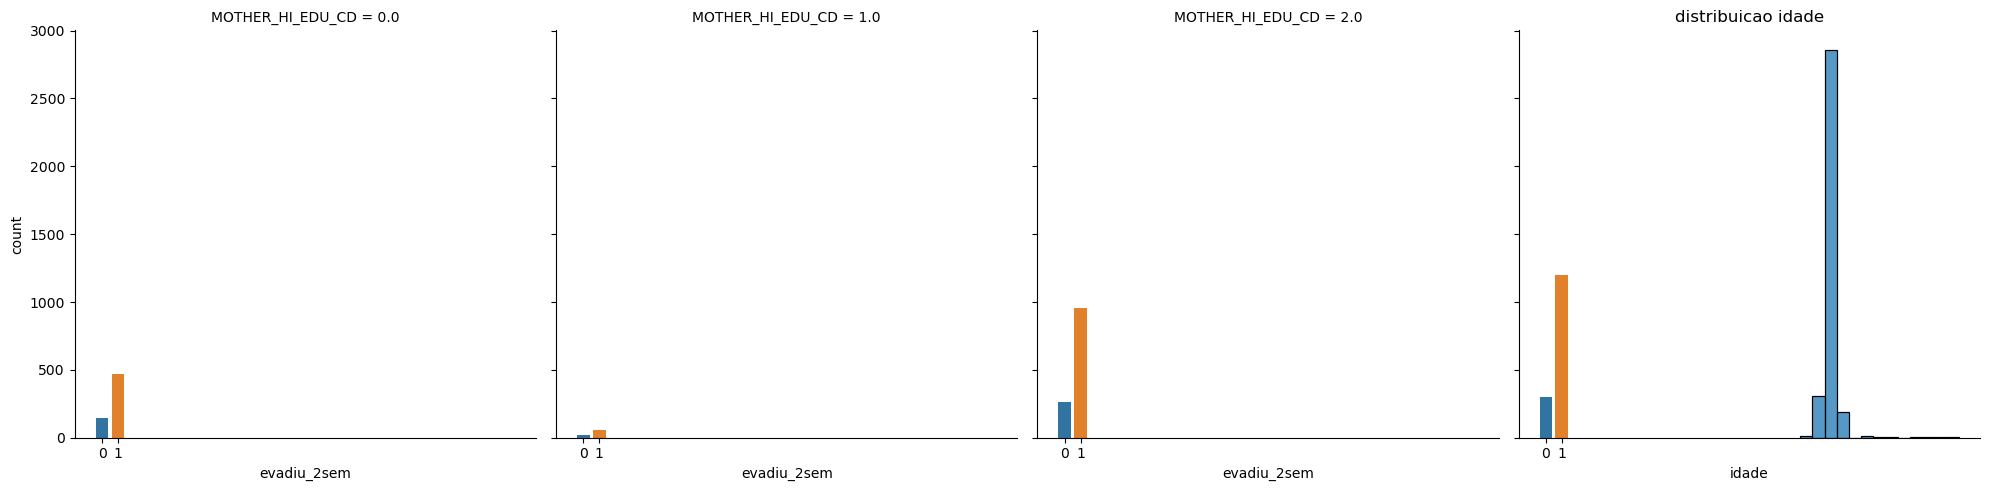

In [54]:
print(df['STDNT_AGE'].value_counts())
print(df['STDNT_AGE'].isnull().sum())
sns.histplot(df['STDNT_AGE'],kde=False)
plt.title('distribuicao idade')
plt.ylabel('numero de ocorrencias')
plt.xlabel('idade')
plt.show()


Dados concentrados em 18, com quantia menor em 17 e 19. As outras idades as quantias são muito pequenas.
Podemos dividir entre abaixo de 18, 18 e acima de 18. Ou eliminar o atributo.
A solução mais simples que evita problemas de idades muito discrepantes é eliminar.

In [55]:
df.drop('STDNT_AGE',axis=1,inplace=True)

#TESTAR BIN <18, 18 e <18

# STDNT_TEST_ENTRANCE1 & STDNT_TEST_ENTRANCE2 & STUDENT_ENTRANCE_COMB

In [56]:
df[['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB']]

,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB
0,NaN,1150.0,1150.0
1,26.0,NaN,1190.0
2,NaN,1020.0,1030.0
3,NaN,1210.0,1220.0
4,NaN,1200.0,1190.0
...,...,...,...
3395,NaN,800.0,790.0
3396,20.0,NaN,950.0
3397,NaN,1020.0,1030.0
3398,21.0,NaN,990.0


In [57]:
df[['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB']].isnull().sum()

STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
dtype: int64

In [58]:
plt.scatter(df['STDNT_TEST_ENTRANCE1'],df['STDNT_TEST_ENTRANCE_COMB'])

In [59]:
plt.scatter(df['STDNT_TEST_ENTRANCE2'],df['STDNT_TEST_ENTRANCE_COMB'])

In [60]:
sns.boxplot(df['STDNT_TEST_ENTRANCE_COMB'])

C:\Users\leonardo.reigoto\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB'>

Muitos dados faltantes e não há muitas informações sobre os campos. Melhor utilizar excluir essas variáveis

In [61]:
df.drop(['STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB'],axis=1,inplace=True)

In [62]:
df.dtypes

STDNT_GENDER                 int64
IN_STATE_FLAG                int64
FIRST_TERM                   int64
SECOND_TERM                  int64
HOUSING_STS                  int64
DISTANCE_FROM_HOME         float64
HIGH_SCHL_GPA              float64
FATHER_HI_EDU_CD           float64
MOTHER_HI_EDU_CD           float64
FIRST_TERM_ATTEMPT_HRS       int64
FIRST_TERM_EARNED_HRS        int64
SECOND_TERM_ATTEMPT_HRS    float64
SECOND_TERM_EARNED_HRS     float64
GROSS_FIN_NEED               int64
COST_OF_ATTEND               int64
EST_FAM_CONTRIBUTION         int64
UNMET_NEED                 float64
matricula                    int64
evadiu_2sem                  int64
BGD0                       float64
BGD1                       float64
BGD2                       float64
BGD3                       float64
BGD4                       float64
BGD5                       float64
GRAD0                      float64
GRAD1                      float64
GRAD2                      float64
GRAD3               

# First term e Second term

In [63]:
df['FIRST_TERM'].value_counts()

200908    676
201008    632
200808    581
200708    521
200608    497
200508    493
Name: FIRST_TERM, dtype: int64

In [64]:
df['SECOND_TERM'].value_counts()

201002    676
201102    632
200902    581
200802    521
200702    497
200602    493
Name: SECOND_TERM, dtype: int64

"FIRST_TERM" e "SECOND_TERM" parecem ser os anos do primeiro/segundo semestre (2005,2006,2007,2008,2009,2010...)
Apesar de termos dados distribuidos entre esses anos, vamos simplificar a analise os eliminando. Nossa proposta aqui não é fazer uma análise temporal, por exemplo queremos utilizar o modelo em 2023 com dados antigos.

In [65]:
df.drop(['FIRST_TERM','SECOND_TERM'],axis=1,inplace=True)

# DISTANCE_FROM_HOME

In [66]:
print('nulls ',df['DISTANCE_FROM_HOME'].isnull().sum())
print(df['DISTANCE_FROM_HOME'].value_counts())


nulls  25
69.0      1402
0.0        671
150.0      497
90.0       248
138.0      227
          ... 
2221.0       1
310.0        1
694.0        1
316.0        1
1216.0       1
Name: DISTANCE_FROM_HOME, Length: 71, dtype: int64


C:\Users\leonardo.reigoto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


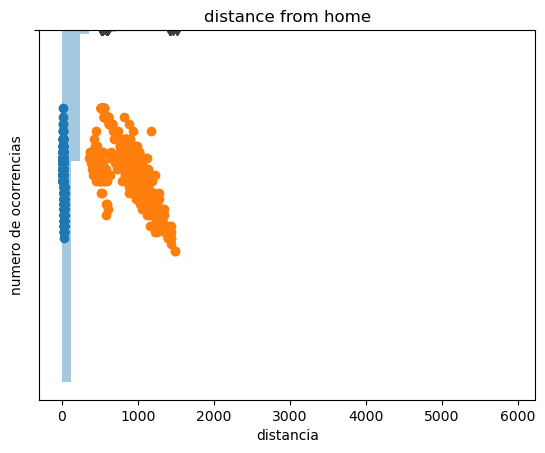

In [67]:
sns.distplot(df['DISTANCE_FROM_HOME'],kde=False)
plt.title('distance from home')
plt.ylabel('numero de ocorrencias')
plt.xlabel('distancia')
plt.show()

In [68]:
sns.boxplot(df['DISTANCE_FROM_HOME'])

C:\Users\leonardo.reigoto\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DISTANCE_FROM_HOME'>

In [69]:
df['DISTANCE_FROM_HOME'].describe()

count    3375.000000
mean       99.825185
std       235.196984
min         0.000000
25%        69.000000
50%        69.000000
75%       138.000000
max      5932.000000
Name: DISTANCE_FROM_HOME, dtype: float64

In [70]:
print(df[df['DISTANCE_FROM_HOME']>138].shape[0])
print(df[df['DISTANCE_FROM_HOME']>200].shape[0])
print(df[df['DISTANCE_FROM_HOME']>250].shape[0])
print(df[df['DISTANCE_FROM_HOME']>300].shape[0])

719
136
74
60


In [71]:
df=df[df['DISTANCE_FROM_HOME']<300]

In [72]:
df.isnull().sum()

STDNT_GENDER                 0
IN_STATE_FLAG                0
HOUSING_STS                  0
DISTANCE_FROM_HOME           0
HIGH_SCHL_GPA               41
FATHER_HI_EDU_CD             0
MOTHER_HI_EDU_CD             0
FIRST_TERM_ATTEMPT_HRS       0
FIRST_TERM_EARNED_HRS        0
SECOND_TERM_ATTEMPT_HRS    199
SECOND_TERM_EARNED_HRS     202
GROSS_FIN_NEED               0
COST_OF_ATTEND               0
EST_FAM_CONTRIBUTION         0
UNMET_NEED                   0
matricula                    0
evadiu_2sem                  0
BGD0                         0
BGD1                         0
BGD2                         0
BGD3                         0
BGD4                         0
BGD5                         0
GRAD0                        0
GRAD1                        0
GRAD2                        0
GRAD3                        0
GRAD4                        0
GRAD5                        0
GRAD6                        0
GRAD7                        0
GRAD8                        0
GRAD9   

# HIGH_SCHL_GPA

In [73]:
print('nulls ',df['HIGH_SCHL_GPA'].isnull().sum())
print(df['HIGH_SCHL_GPA'].value_counts())

nulls  41
3.0000    142
4.0000    121
3.5000     86
2.9300     72
3.1300     70
         ... 
3.9500      1
2.0400      1
2.9230      1
2.4500      1
3.6875      1
Name: HIGH_SCHL_GPA, Length: 198, dtype: int64


In [74]:
sns.distplot(df['HIGH_SCHL_GPA'],kde=False)

C:\Users\leonardo.reigoto\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HIGH_SCHL_GPA'>

In [75]:
df['HIGH_SCHL_GPA'].describe()

count    3274.000000
mean        3.202411
std         0.453368
min         0.000000
25%         2.870000
50%         3.200000
75%         3.560000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [76]:
sns.boxplot(df['HIGH_SCHL_GPA'])

C:\Users\leonardo.reigoto\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HIGH_SCHL_GPA'>

In [77]:
df.dropna(subset=['HIGH_SCHL_GPA'],inplace=True)

In [78]:
df.shape

(3274, 41)

In [79]:
df.isnull().sum()

STDNT_GENDER                 0
IN_STATE_FLAG                0
HOUSING_STS                  0
DISTANCE_FROM_HOME           0
HIGH_SCHL_GPA                0
FATHER_HI_EDU_CD             0
MOTHER_HI_EDU_CD             0
FIRST_TERM_ATTEMPT_HRS       0
FIRST_TERM_EARNED_HRS        0
SECOND_TERM_ATTEMPT_HRS    197
SECOND_TERM_EARNED_HRS     200
GROSS_FIN_NEED               0
COST_OF_ATTEND               0
EST_FAM_CONTRIBUTION         0
UNMET_NEED                   0
matricula                    0
evadiu_2sem                  0
BGD0                         0
BGD1                         0
BGD2                         0
BGD3                         0
BGD4                         0
BGD5                         0
GRAD0                        0
GRAD1                        0
GRAD2                        0
GRAD3                        0
GRAD4                        0
GRAD5                        0
GRAD6                        0
GRAD7                        0
GRAD8                        0
GRAD9   

# FIRST_TERM_ATTEMPT_HRS, FIRST_TERM_EARNED_HRS

In [80]:
print('nulls ',df['FIRST_TERM_ATTEMPT_HRS'].isnull().sum())
print(df['FIRST_TERM_ATTEMPT_HRS'].value_counts())

nulls  0
15    767
13    720
12    715
14    511
16    417
17    102
18     27
19      8
9       3
20      2
11      2
Name: FIRST_TERM_ATTEMPT_HRS, dtype: int64


In [81]:
print('nulls ',df['FIRST_TERM_EARNED_HRS'].isnull().sum())
print(df['FIRST_TERM_EARNED_HRS'].value_counts())

nulls  0
12    666
13    508
15    506
14    306
9     281
16    246
10    205
11    153
6      94
8      92
7      68
17     46
3      32
4      18
18     14
5      12
19      7
0       7
2       7
1       5
20      1
Name: FIRST_TERM_EARNED_HRS, dtype: int64


In [82]:
(df['FIRST_TERM_ATTEMPT_HRS']-df['FIRST_TERM_EARNED_HRS']).value_counts()

 0     1956
 4      426
 3      392
 6      132
 7      110
 1       92
 10      33
 5       29
 9       29
 2       20
 8       16
 11      12
 12      10
 13       8
-3        4
 14       3
 15       2
dtype: int64

In [83]:
temp=df[(df['FIRST_TERM_ATTEMPT_HRS']- df['FIRST_TERM_EARNED_HRS']<0)].index.tolist()
temp

[906, 998, 2262, 3342]

In [84]:
df.loc[temp,['FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS']]

,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS
906,13,16
998,9,12
2262,13,16
3342,11,14


Esses indices tem o número de creditos ganhos maior que o cursado. Provavelmente foi inversão na hora de preencher a coluna.
Vamos inverte-las

In [85]:
for linha in temp:
    temp2=df.loc[linha]['FIRST_TERM_ATTEMPT_HRS']
    df.loc[linha,['FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS']]=[df.loc[linha]['FIRST_TERM_EARNED_HRS'],temp2]

In [86]:
df.loc[temp,['FIRST_TERM_ATTEMPT_HRS','FIRST_TERM_EARNED_HRS']]

,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS
906,16,13
998,12,9
2262,16,13
3342,14,11


Creditos cursados e creditos ganhos tem alta correlação. Vamos criar um novo atribute que seriam creditos reprovados e remover o creditos ganhos.

In [87]:
df['First_Lost_Hours']=df['FIRST_TERM_ATTEMPT_HRS']-df['FIRST_TERM_EARNED_HRS']
df.drop('FIRST_TERM_EARNED_HRS',axis=1,inplace=True)
print(df['First_Lost_Hours'].value_counts())

0     1956
4      426
3      396
6      132
7      110
1       92
10      33
5       29
9       29
2       20
8       16
11      12
12      10
13       8
14       3
15       2
Name: First_Lost_Hours, dtype: int64


# SECOND_TERM_ATTEMPT_HRS, SECOND_TERM_EARNED_HRS

In [88]:
print('nulls ',df['SECOND_TERM_ATTEMPT_HRS'].isnull().sum())
df['SECOND_TERM_ATTEMPT_HRS'].value_counts()

nulls  197


15.0    592
12.0    590
13.0    549
16.0    461
14.0    410
17.0    199
18.0    112
19.0     69
9.0      20
10.0     20
11.0     19
20.0     10
7.0       8
6.0       4
8.0       3
4.0       3
3.0       3
23.0      2
21.0      1
22.0      1
2.0       1
Name: SECOND_TERM_ATTEMPT_HRS, dtype: int64

In [89]:
print('nulls ',df['SECOND_TERM_EARNED_HRS'].isnull().sum())
df['SECOND_TERM_EARNED_HRS'].value_counts()

nulls  200


12.0    542
15.0    423
13.0    416
14.0    297
16.0    297
9.0     238
10.0    163
17.0    127
11.0    111
6.0      92
18.0     81
8.0      59
7.0      58
3.0      56
19.0     29
4.0      25
5.0      19
0.0      19
20.0      8
2.0       8
1.0       3
23.0      2
21.0      1
Name: SECOND_TERM_EARNED_HRS, dtype: int64

In [90]:
temp=df[(df['SECOND_TERM_ATTEMPT_HRS'].isnull()) & (df['SECOND_TERM_EARNED_HRS'].isnull())].index.tolist()
len(temp)
print(df.loc[temp]['evadiu_2sem'].value_counts())

0    172
1     25
Name: evadiu_2sem, dtype: int64


A maior parte dos alunos que tem valores nulos nesse campo sairam (172 sairam e 25 continuaram). Provavelmente são alunos que não cursaram materia no segundo semestre e já desistiram no primeiro semestre. Poderiamos criar um atributo "tentou_segundo_semestre" que indicaria se o aluno cursou ou não o segundo semestre. Ele provavelmente iria aumentar a taxa de acerto pois é importante para avaliar a desistência. Mas iriamos acabar prevendo um evento já observado. No lugar vamos apenas preencher esses campos com 0, mas mesmo assim o classificador irá tender a classificar a desistência baseado em observar 0 nesses campos.

In [91]:
df['SECOND_TERM_ATTEMPT_HRS'].fillna(0,inplace=True)
df['SECOND_TERM_EARNED_HRS'].fillna(0,inplace=True)

In [92]:
temp=df[(df['SECOND_TERM_ATTEMPT_HRS']- df['SECOND_TERM_EARNED_HRS']<0)].index.tolist()
temp

[662]

In [93]:
df['Second_Lost_Hours']=df['SECOND_TERM_ATTEMPT_HRS']-df['SECOND_TERM_EARNED_HRS']
df.drop('SECOND_TERM_EARNED_HRS',axis=1,inplace=True)
df['Second_Lost_Hours'].value_counts()

 0.0     2074
 3.0      437
 4.0      259
 6.0      139
 7.0      108
 1.0       74
 9.0       45
 10.0      35
 2.0       27
 8.0       19
 12.0      16
 5.0       15
 13.0      12
 11.0       7
 14.0       2
 16.0       2
 15.0       2
-1.0        1
Name: Second_Lost_Hours, dtype: int64

# GROSS_FIN_NEED  

In [94]:
print(df['GROSS_FIN_NEED'].isnull().sum())
(df['GROSS_FIN_NEED'].value_counts())

0


0          2138
1418100      68
1306020      18
1146420      15
1316580      14
           ... 
996000        1
809940        1
851220        1
1381320       1
244560        1
Name: GROSS_FIN_NEED, Length: 902, dtype: int64

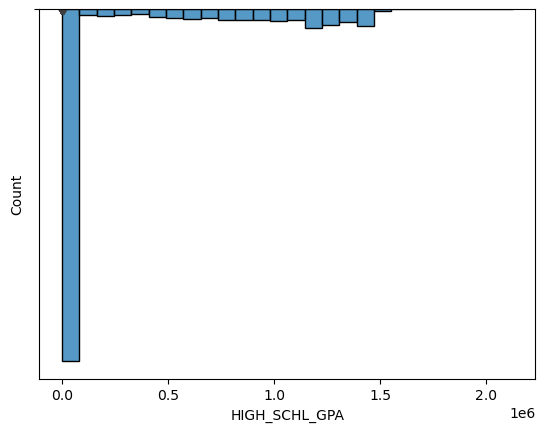

In [95]:
sns.histplot(df['GROSS_FIN_NEED'],kde=False)
plt.show()

In [96]:
len(df[df['GROSS_FIN_NEED']>1.6*10e5])
df=df[df['GROSS_FIN_NEED']<1.6*10e5]

In [97]:
#df.drop('GROSS_FIN_NEED',axis=1,inplace=True)

# COST_OF_ATTEND e EST_FAM_CONTRIBUTION e UNMET_NEED 

In [98]:
print(df['UNMET_NEED'].isnull().sum())
df['UNMET_NEED'].value_counts() 

0


 0.0         1740
-417420.0      59
-347580.0      43
-288180.0      40
-326880.0      39
             ... 
 335460.0       1
 338520.0       1
-135000.0       1
 433800.0       1
-289140.0       1
Name: UNMET_NEED, Length: 1149, dtype: int64

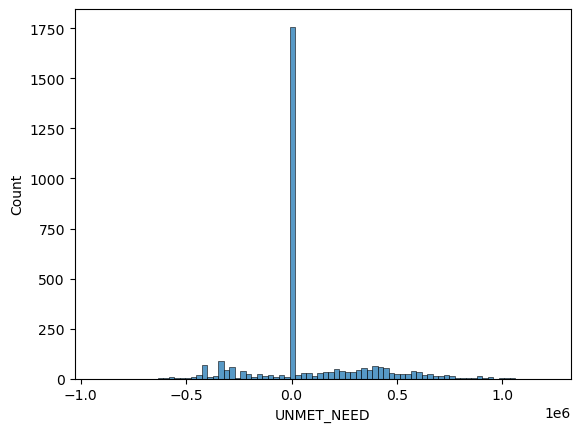

In [99]:
sns.histplot(df['UNMET_NEED'],kde=False)
plt.show()

In [100]:
sns.boxplot(df['UNMET_NEED'])

C:\Users\leonardo.reigoto\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UNMET_NEED'>

In [101]:
df['UNMET_NEED'].describe()

count    3.273000e+03
mean     7.558977e+04
std      2.729110e+05
min     -9.213000e+05
25%      0.000000e+00
50%      0.000000e+00
75%      1.958400e+05
max      1.216980e+06
Name: UNMET_NEED, dtype: float64

In [102]:
df.drop(['UNMET_NEED'],axis=1,inplace=True)

# COST_OF_ATTEND

In [103]:
print(df['COST_OF_ATTEND'].isnull().sum())
df['COST_OF_ATTEND'].value_counts() 

0


0          1614
1418100     215
1176420      97
1146420      84
1306020      83
           ... 
2082900       1
1559220       1
845940        1
1804860       1
833160        1
Name: COST_OF_ATTEND, Length: 114, dtype: int64

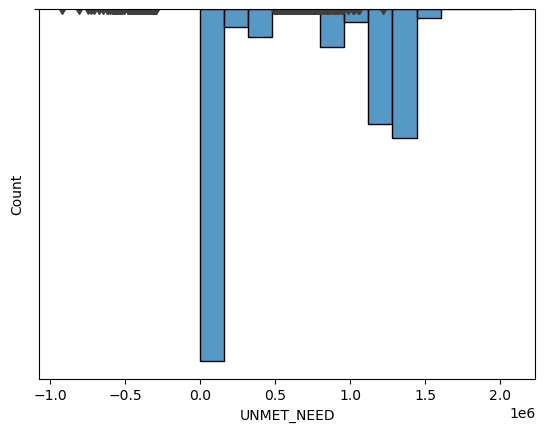

In [104]:
sns.histplot(df['COST_OF_ATTEND'],kde=False)
plt.show()

In [105]:
sns.boxplot(df['COST_OF_ATTEND'])

C:\Users\leonardo.reigoto\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='COST_OF_ATTEND'>

# EST FAM CONTRIBUTION

In [106]:
print('nulls ',df['EST_FAM_CONTRIBUTION'].isnull().sum())
df['EST_FAM_CONTRIBUTION'].value_counts() 

nulls  0


0          2027
5999940      12
1080          4
800220        3
2400          3
           ... 
1760700       1
602460        1
1607100       1
647880        1
1288980       1
Name: EST_FAM_CONTRIBUTION, Length: 1196, dtype: int64

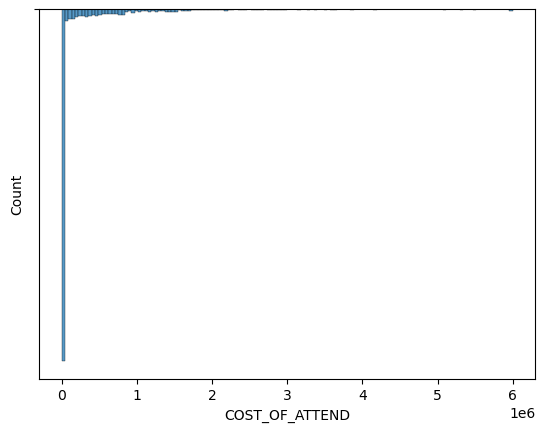

In [107]:
sns.histplot(df['EST_FAM_CONTRIBUTION'],kde=False)
plt.show()

In [108]:
df['EST_FAM_CONTRIBUTION'].describe()

count    3.273000e+03
mean     3.473875e+05
std      7.934443e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.276600e+05
max      5.999940e+06
Name: EST_FAM_CONTRIBUTION, dtype: float64

In [109]:
df.drop(['EST_FAM_CONTRIBUTION'],axis=1,inplace=True)

In [110]:
df.columns

Index(['STDNT_GENDER', 'IN_STATE_FLAG', 'HOUSING_STS', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD',
       'FIRST_TERM_ATTEMPT_HRS', 'SECOND_TERM_ATTEMPT_HRS', 'GROSS_FIN_NEED',
       'COST_OF_ATTEND', 'matricula', 'evadiu_2sem', 'BGD0', 'BGD1', 'BGD2',
       'BGD3', 'BGD4', 'BGD5', 'GRAD0', 'GRAD1', 'GRAD2', 'GRAD3', 'GRAD4',
       'GRAD5', 'GRAD6', 'GRAD7', 'GRAD8', 'GRAD9', 'GRAD10', 'GRAD11',
       'GRAD12', 'GRAD13', 'GRAD14', 'GRAD15', 'GRAD16', 'GRAD17',
       'First_Lost_Hours', 'Second_Lost_Hours'],
      dtype='object')

In [111]:
df.set_index('matricula',inplace=True)

In [112]:
df.head()

,STDNT_GENDER,IN_STATE_FLAG,HOUSING_STS,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,SECOND_TERM_ATTEMPT_HRS,GROSS_FIN_NEED,...,GRAD10,GRAD11,GRAD12,GRAD13,GRAD14,GRAD15,GRAD16,GRAD17,First_Lost_Hours,Second_Lost_Hours
matricula,,,,,,,,,,,,,,,,,,,,,
7808615,0,1,1,150.0,4.00,0.0,0.0,16,14.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7830063,0,0,0,69.0,2.89,3.0,3.0,18,18.0,570000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7847538,1,1,1,150.0,3.39,2.0,0.0,15,14.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
8006429,1,1,1,150.0,2.93,3.0,3.0,13,14.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7962680,0,1,0,69.0,3.86,3.0,2.0,12,12.0,835920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [113]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)

In [114]:
X_train=df_train.drop('evadiu_2sem',axis=1)
y_train=df_train['evadiu_2sem']
X_test=df_test.drop('evadiu_2sem',axis=1)
y_test=df_test['evadiu_2sem']

In [115]:
X_train.shape

(2945, 37)

In [116]:
X_train

,STDNT_GENDER,IN_STATE_FLAG,HOUSING_STS,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FATHER_HI_EDU_CD,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,SECOND_TERM_ATTEMPT_HRS,GROSS_FIN_NEED,...,GRAD10,GRAD11,GRAD12,GRAD13,GRAD14,GRAD15,GRAD16,GRAD17,First_Lost_Hours,Second_Lost_Hours
matricula,,,,,,,,,,,,,,,,,,,,,
7799972,0,1,1,138.0,3.60,0.0,0.0,18,14.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7912807,0,1,0,59.0,3.64,2.0,3.0,12,13.0,1340880,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7942758,1,0,0,0.0,3.16,0.0,0.0,15,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7986328,1,1,1,90.0,3.36,2.0,3.0,15,17.0,867060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0
7950237,0,1,1,69.0,3.35,0.0,0.0,16,12.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7865723,0,1,0,69.0,3.90,2.0,2.0,15,14.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.0
7946138,1,1,0,69.0,3.50,2.0,2.0,14,13.0,813780,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0
7976128,0,1,1,69.0,3.60,2.0,3.0,17,14.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [117]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [118]:
print(X_train.shape)
counter = Counter(y_train)
print(counter)

(2945, 37)
Counter({1: 2334, 0: 611})


# COM OVERSAMPLE (SMOTE)

In [119]:
oversampler=SMOTE(random_state=42)
X_train_smote,  y_train_smote = oversampler.fit_resample(X_train,y_train)

In [120]:
counter = Counter(y_train_smote)
print(counter)

Counter({0: 2334, 1: 2334})


In [121]:
scaler_smote=StandardScaler()
X_train_smote_svm=scaler_smote.fit_transform(X_train_smote)
X_test_smote_svm=scaler_smote.transform(X_test)
joblib.dump(scaler_smote,'scaler_smote.sav')

['scaler_smote.sav']

# Default

Teste de acuracia (predict):  0.7012195121951219


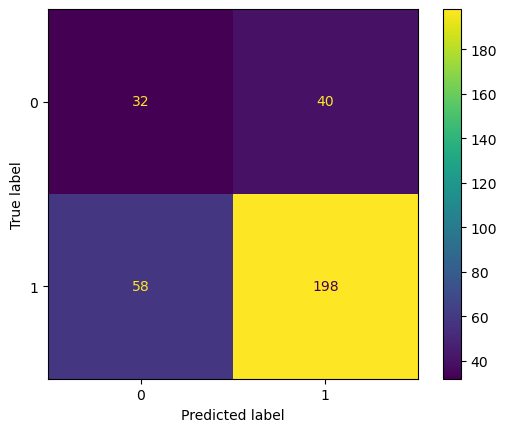

In [122]:
clf_proba=svm.SVC(kernel='linear',probability=True)
clf_proba.fit(X_train_smote_svm,y_train_smote)
yhat2=clf_proba.predict(X_test_smote_svm)
yhatproba=clf_proba.predict_proba(X_test_smote_svm)
yhatproba2=np.argmax(yhatproba,axis=1)

print('Teste de acuracia (predict): ',accuracy_score(y_test,yhat2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhat2))
disp.plot()
plt.show()

In [123]:
yhatproba[0:5,:]

array([[0.46877092, 0.53122908],
       [0.17826848, 0.82173152],
       [0.49260674, 0.50739326],
       [0.33601644, 0.66398356],
       [0.81073974, 0.18926026]])

Teste de acuracia (predict_proba):  0.6890243902439024


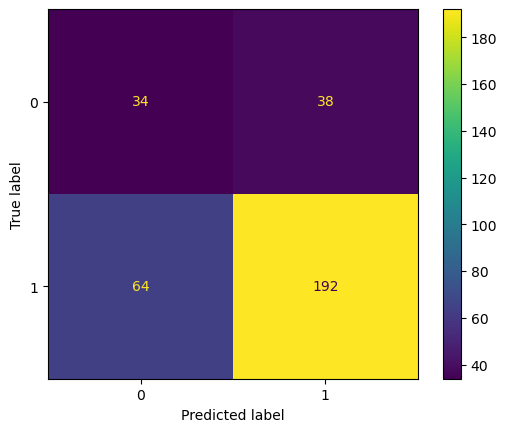

In [124]:
print('Teste de acuracia (predict_proba): ',accuracy_score(y_test,yhatproba2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhatproba2))
disp.plot()
plt.show()

# Gridsearch

In [125]:

make_pipeline(SMOTE(random_state=42),StandardScaler(), svm.SVC())


parameters = {
                'svc__kernel': ['linear'],#, 'poly', 'rbf'],#, 'sigmoid'],
                'svc__C': [0.01, 0.1, 1, 10, 100],
            }

grid_hyper(make_pipeline(SMOTE(random_state=42),StandardScaler(), svm.SVC()),X_train,y_train,X_test,y_test,parameters)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy Score = 0.71
{'svc__C': 0.01, 'svc__kernel': 'linear'}


Teste de acuracia (predict):  0.7073170731707317


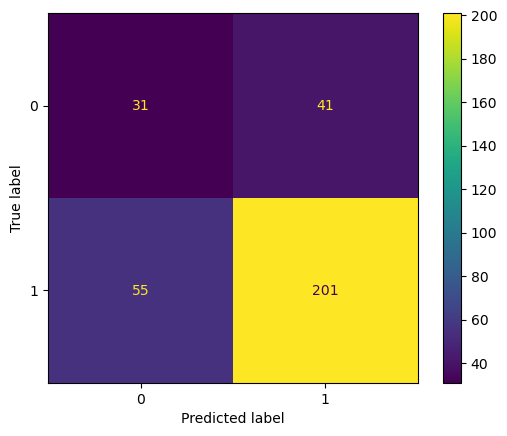

In [126]:
clf_proba=svm.SVC(kernel='linear',C=0.01,probability=True)
clf_proba.fit(X_train_smote_svm,y_train_smote)
yhat2=clf_proba.predict(X_test_smote_svm)
yhatproba=clf_proba.predict_proba(X_test_smote_svm)
yhatproba2=np.argmax(yhatproba,axis=1)

print('Teste de acuracia (predict): ',accuracy_score(y_test,yhat2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhat2))
disp.plot()
plt.show()

Teste de acuracia (predict_proba):  0.676829268292683


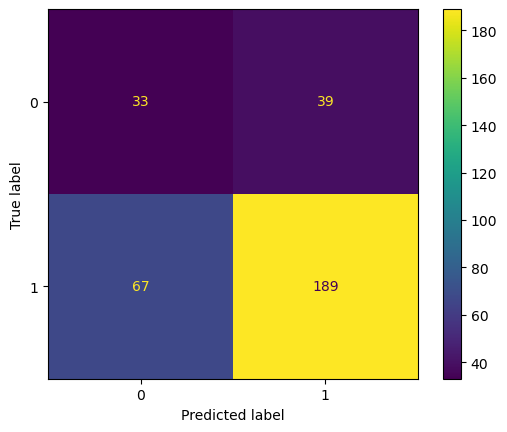

In [127]:
print('Teste de acuracia (predict_proba): ',accuracy_score(y_test,yhatproba2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhatproba2))
disp.plot()
plt.show()

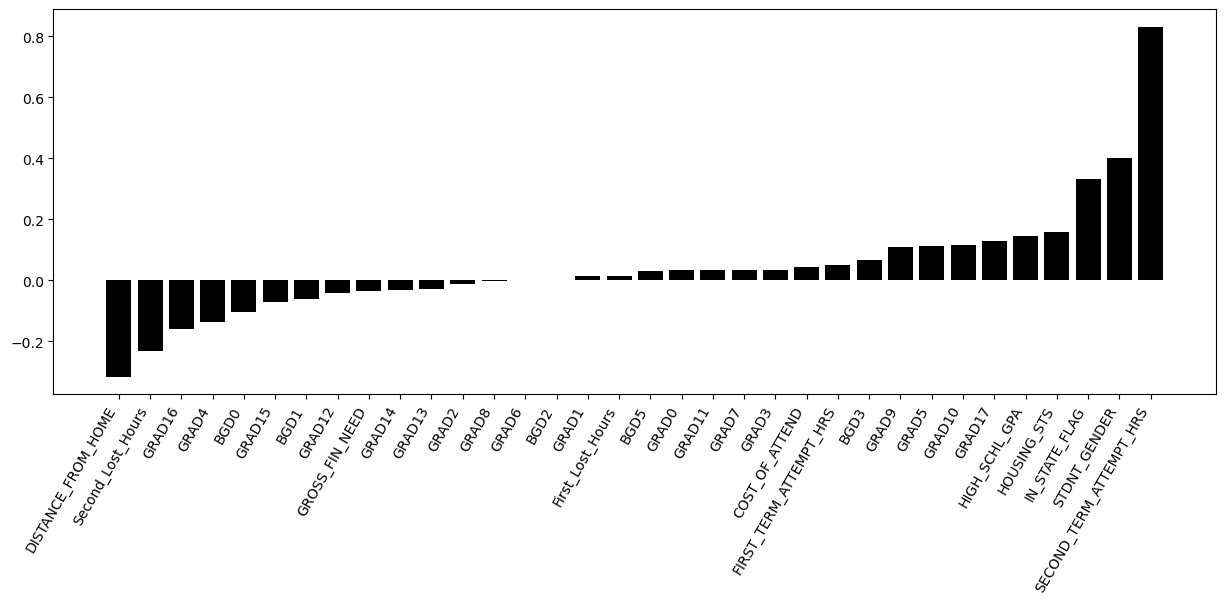

In [128]:
plot_coefficients(clf_proba, X_train.columns)

Teste de acuracia (predict):  0.6798780487804879


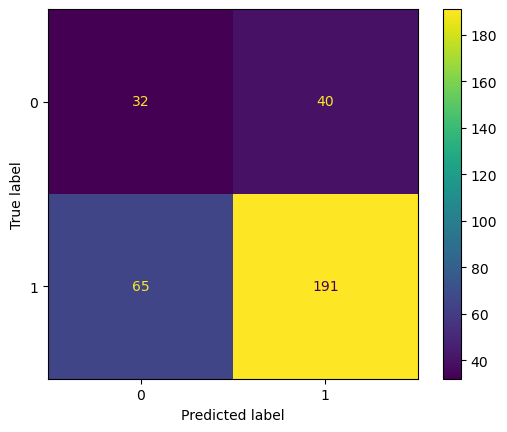

In [129]:
base_clf=svm.SVC(kernel='linear',class_weight='balanced',C=0.01)
clf = CalibratedClassifierCV(base_estimator=base_clf, cv=10)
clf.fit(X_train_smote_svm,y_train_smote)
yhat2=clf.predict(X_test_smote_svm)
yhatproba=clf.predict_proba(X_test_smote_svm)
yhatproba2=np.argmax(yhatproba,axis=1)

print('Teste de acuracia (predict): ',accuracy_score(y_test,yhat2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhat2))
disp.plot()
plt.show()

In [130]:
yhatproba[0:5,:]

array([[0.45776405, 0.54223595],
       [0.17323751, 0.82676249],
       [0.49421319, 0.50578681],
       [0.32988452, 0.67011548],
       [0.81682032, 0.18317968]])

Teste de acuracia (predict):  0.6798780487804879


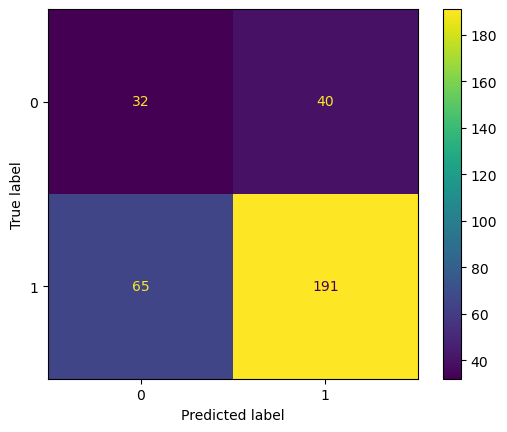

In [131]:
print('Teste de acuracia (predict): ',accuracy_score(y_test,yhatproba2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhatproba2))
disp.plot()
plt.show()

# Balanceamento de métricas

Teste de acuracia (predict):  0.7682926829268293


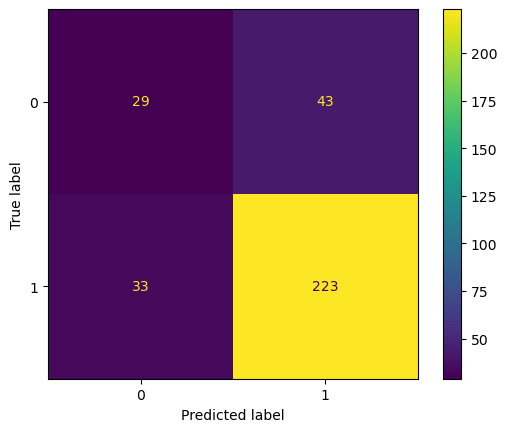

In [132]:
scaler2=StandardScaler()
X_train__scale=scaler2.fit_transform(X_train)
X_test__scale=scaler2.transform(X_test)

clf_proba=svm.SVC(kernel='linear',probability=True,class_weight='balanced')
clf_proba.fit(X_train__scale,y_train)
yhat2=clf_proba.predict(X_test__scale)
yhatproba=clf_proba.predict_proba(X_test__scale)
yhatproba2=np.argmax(yhatproba,axis=1)

print('Teste de acuracia (predict): ',accuracy_score(y_test,yhat2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhat2))
disp.plot()
plt.show()

Teste de acuracia (predict_proba):  0.8140243902439024


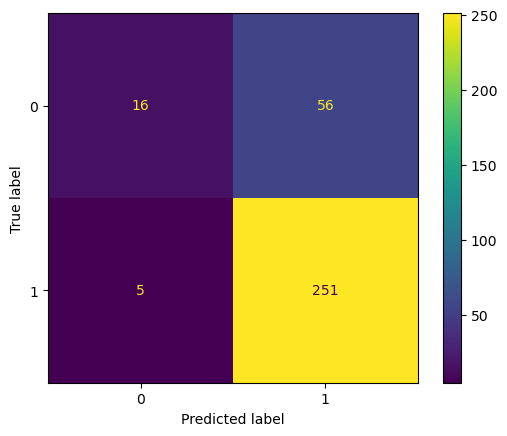

In [133]:
print('Teste de acuracia (predict_proba): ',accuracy_score(y_test,yhatproba2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhatproba2))
disp.plot()
plt.show()

# GRIDSEARCH

In [134]:
make_pipeline(SMOTE(random_state=42),StandardScaler(), svm.SVC())


parameters = {
                'svc__kernel': ['linear'],#, 'poly', 'rbf']
                'svc__C': [0.01, 0.1, 1, 10, 100],
            }

grid_hyper(make_pipeline(StandardScaler(), svm.SVC(class_weight='balanced')),X_train,y_train,X_test,y_test,parameters)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy Score = 0.79
{'svc__C': 0.01, 'svc__kernel': 'linear'}


Teste de acuracia (predict):  0.7865853658536586


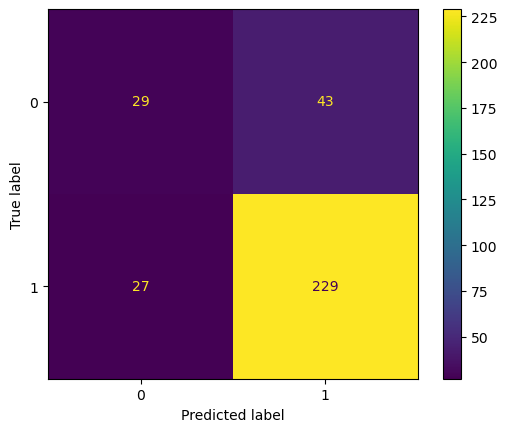

In [135]:
clf_proba=svm.SVC(kernel='linear',C=0.01,probability=True,class_weight='balanced')
clf_proba.fit(X_train__scale,y_train)
yhat2=clf_proba.predict(X_test__scale)
yhatproba=clf_proba.predict_proba(X_test__scale)
yhatproba2=np.argmax(yhatproba,axis=1)

print('Teste de acuracia (predict): ',accuracy_score(y_test,yhat2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhat2))
disp.plot()
plt.show()

In [136]:
yhatproba[0:5,:]

array([[0.10419688, 0.89580312],
       [0.18597046, 0.81402954],
       [0.21850462, 0.78149538],
       [0.1828418 , 0.8171582 ],
       [0.43230734, 0.56769266]])

Teste de acuracia (predict):  0.8109756097560976


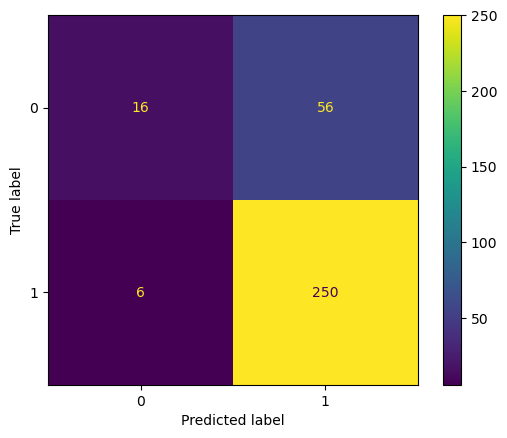

In [137]:
print('Teste de acuracia (predict): ',accuracy_score(y_test,yhatproba2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhatproba2))
disp.plot()
plt.show()

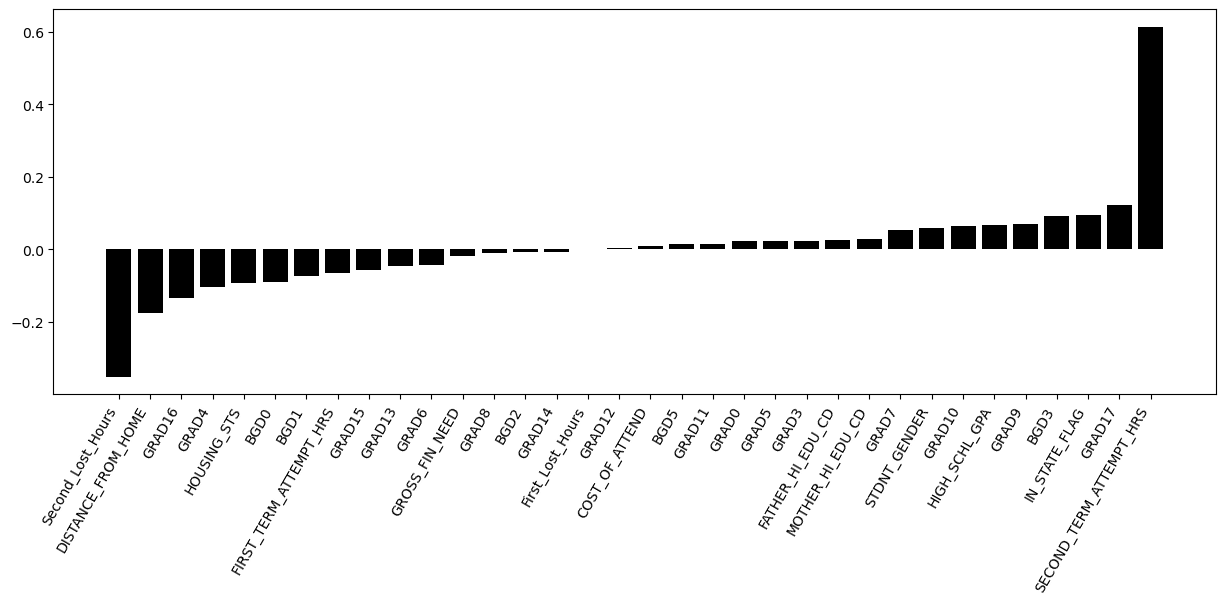

In [138]:
plot_coefficients(clf_proba, X_train.columns)


Teste de acuracia (predict):  0.8109756097560976


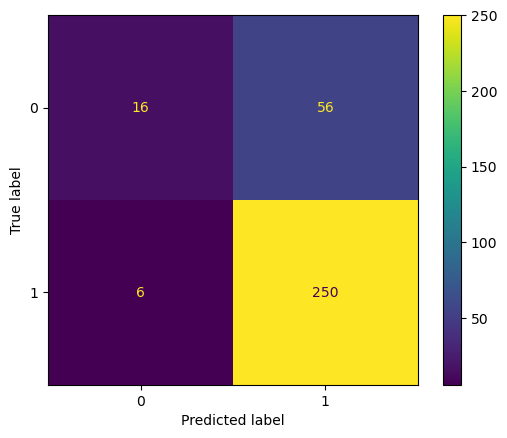

In [139]:
base_clf=svm.SVC(kernel='linear',class_weight='balanced',C=0.01)
clf = CalibratedClassifierCV(base_estimator=base_clf, cv=10)
clf.fit(X_train__scale,y_train)
yhat2=clf.predict(X_test__scale)
yhatproba=clf.predict_proba(X_test__scale)
yhatproba2=np.argmax(yhatproba,axis=1)

print('Teste de acuracia (predict): ',accuracy_score(y_test,yhat2))
disp=ConfusionMatrixDisplay(confusion_matrix(y_test,yhat2))
disp.plot()
plt.show()

In [140]:
yhatproba[0:5,:]

array([[0.10352707, 0.89647293],
       [0.184779  , 0.815221  ],
       [0.21059288, 0.78940712],
       [0.17912985, 0.82087015],
       [0.42134344, 0.57865656]])